## Problem : The dataset includes enviromental sensor data with the occupancy status of a certain room. The aim is to train a model that can perdict the occupancy status and control the electronic appliances such as lights for enegy saving.

In [82]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn import preprocessing

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

import datetime


In [83]:
data = pd.read_csv('Housing_Data.csv')
print(data.shape)
data.sample(10)

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26349,Preston,57 Robeson St,3,h,NaN,S,Nelson,28/10/2017,8.4,3072.0,...,1.0,2.0,5040.0,NaN,NaN,Darebin City Council,-37.74609,144.98654,Northern Metropolitan,14577.0
20807,South Kingsville,49 Kernot St,3,h,1124000.0,S,Hunter,9/09/2017,6.2,3015.0,...,1.0,2.0,NaN,NaN,NaN,Hobsons Bay City Council,-37.83053,144.87289,Western Metropolitan,984.0
19525,Kew,6/385 Barkers Rd,3,t,1405000.0,S,Buckingham,29/07/2017,5.4,3101.0,...,2.0,2.0,325.0,129.0,1980.0,Boroondara City Council,-37.81614,145.05056,Southern Metropolitan,10331.0
811,Avondale Heights,17 Cannes Av,4,h,820000.0,VB,Nelson,27/11/2016,10.5,3034.0,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,4502.0
25342,Ringwood,13 Sherbrook Av,4,h,1260000.0,S,Carter,21/10/2017,19.9,3134.0,...,2.0,1.0,NaN,180.0,1964.0,Maroondah City Council,-37.81542,145.21839,Eastern Metropolitan,7785.0
16308,Hampton,13 Mills St,2,t,1285000.0,S,Hodges,24/06/2017,13.8,3188.0,...,1.0,1.0,348.0,100.0,1992.0,Bayside City Council,-37.93557,145.00463,Southern Metropolitan,5454.0
9835,Sunshine,6/1 Lorraine Ct,2,u,NaN,SP,Sweeney,26/07/2016,12.6,3020.0,...,1.0,1.0,166.0,89.0,1970.0,Brimbank City Council,-37.78640,144.82120,Western Metropolitan,3755.0
748,Avondale Heights,8 Norma Ct,3,h,850000.0,S,Moonee,3/09/2016,10.5,3034.0,...,1.0,1.0,593.0,118.0,1970.0,Moonee Valley City Council,-37.76770,144.86740,Western Metropolitan,4502.0
432,Armadale,10/581 Orrong Rd,1,u,440000.0,SP,Jellis,18/03/2017,6.3,3143.0,...,1.0,1.0,0.0,53.0,1970.0,Stonnington City Council,-37.85310,145.01150,Southern Metropolitan,4836.0
26871,Bundoora,1117 Plenty Rd,3,u,550000.0,PI,hockingstuart,11/11/2017,12.1,3083.0,...,3.0,2.0,NaN,92.0,NaN,Banyule City Council,-37.70610,145.05310,Northern Metropolitan,10175.0


In [84]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857.0,NaN,NaN,NaN,3.031012,0.969933,1.0,2.0,3.0,4.0,16.0
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247.0,NaN,NaN,NaN,1050173.344955,641467.130105,85000.0,635000.0,870000.0,1295000.0,11200000.0
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856.0,NaN,NaN,NaN,11.184929,6.788892,0.0,6.4,10.3,14.0,48.1
Postcode,34856.0,NaN,NaN,NaN,3116.062859,109.023903,3000.0,3051.0,3103.0,3156.0,3978.0


#### We can drop following colomns because we need to predict price in a certain area.

In [85]:
data.drop(labels='Address', axis=1, inplace=True)
data.drop(labels='Lattitude', axis=1, inplace=True)
data.drop(labels='Longtitude', axis=1, inplace=True)

#### We can drop following colomns because follwing details cannot be get as a input from user.

In [86]:
data.drop(labels='SellerG', axis=1, inplace=True)
data.drop(labels='Propertycount', axis=1, inplace=True)

#### We can also drop 'Postcode','CouncilArea','RegionName' colomn because 'Suburb' can be used to identify a certain area

In [87]:
Suburb_Data = data[['Postcode','CouncilArea','Regionname']]
data.drop(labels='Postcode', axis=1, inplace=True)
data.drop(labels='CouncilArea', axis=1, inplace=True)
data.drop(labels='Regionname', axis=1, inplace=True)

In [88]:
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for index, row in data.iterrows():
    temp_date = datetime.datetime.strptime(row['Date'], date_format)
    if(row['YearBuilt'] > temp_date.year):
        data.drop(index, inplace=True)




In [89]:
temp_data = []
in_data = data['Date'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    temp_date = datetime.datetime.strptime(row, date_format)
    delta = today - temp_date
    #data['NofDays',index]= delta.days
    temp_data.append(delta.days)
data['DaysFromSale'] = temp_data

data.drop(labels='Date', axis=1, inplace=True)

In [90]:
temp_data = []
in_data = data['YearBuilt'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    if(np.isnan(row)):
        temp_data.append(np.NaN)
    else:
        temp_data.append(today.year - row)
data['Age'] = temp_data

data.drop(labels='YearBuilt', axis=1, inplace=True)

#### Drop rows with null values and copy into tempory dataframe

In [91]:
Temp_data = data.dropna(how='any', axis=0, inplace=False)

In [92]:
correlation_matrix = Temp_data.corr()
correlation_matrix

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,DaysFromSale,Age
Rooms,1.000000,0.475012,0.277006,0.965080,0.624698,0.401482,0.101021,0.607415,-0.231319,-0.007376
Price,0.475012,1.000000,-0.231381,0.460824,0.463573,0.209152,0.058455,0.507438,-0.019270,0.313886
Distance,0.277006,-0.231381,1.000000,0.284025,0.122548,0.259555,0.138296,0.135830,-0.366312,-0.314062
Bedroom,0.965080,0.460824,0.284025,1.000000,0.626365,0.405690,0.100975,0.595180,-0.257610,-0.016092
Bathroom,0.624698,0.463573,0.122548,0.626365,1.000000,0.311766,0.075789,0.553675,-0.133412,-0.192677
Car,0.401482,0.209152,0.259555,0.405690,0.311766,1.000000,0.123345,0.317362,-0.182537,-0.139457
Landsize,0.101021,0.058455,0.138296,0.100975,0.075789,0.123345,1.000000,0.083226,-0.092522,-0.037205
BuildingArea,0.607415,0.507438,0.135830,0.595180,0.553675,0.317362,0.083226,1.000000,-0.105365,-0.059296
DaysFromSale,-0.231319,-0.019270,-0.366312,-0.257610,-0.133412,-0.182537,-0.092522,-0.105365,1.000000,0.121303
Age,-0.007376,0.313886,-0.314062,-0.016092,-0.192677,-0.139457,-0.037205,-0.059296,0.121303,1.000000


#### We can also drop 'Landsize', 'DaysFromSale' since it very low correlation with price

In [93]:
data.drop(labels='Landsize', axis=1, inplace=True)
data.drop(labels='DaysFromSale', axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.dropna(how='any', axis=0, inplace=True)

In [94]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,10053,323,Reservoir,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,10053.0,NaN,NaN,NaN,3.112106,0.961591,1.0,3.0,3.0,4.0,12.0
Type,10053,3,h,7478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10053.0,NaN,NaN,NaN,1085265.27176,679786.57345,131000.0,635000.0,890000.0,1330000.0,9000000.0
Method,10053,5,S,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,10053.0,NaN,NaN,NaN,11.528658,7.056176,0.0,6.5,10.5,14.3,48.1
Bedroom,10053.0,NaN,NaN,NaN,3.093107,0.963875,0.0,2.0,3.0,4.0,12.0
Bathroom,10053.0,NaN,NaN,NaN,1.657515,0.717846,1.0,1.0,2.0,2.0,9.0
Car,10053.0,NaN,NaN,NaN,1.706655,0.969179,0.0,1.0,2.0,2.0,10.0
BuildingArea,10053.0,NaN,NaN,NaN,150.336051,87.705643,0.0,100.0,133.0,181.0,3112.0


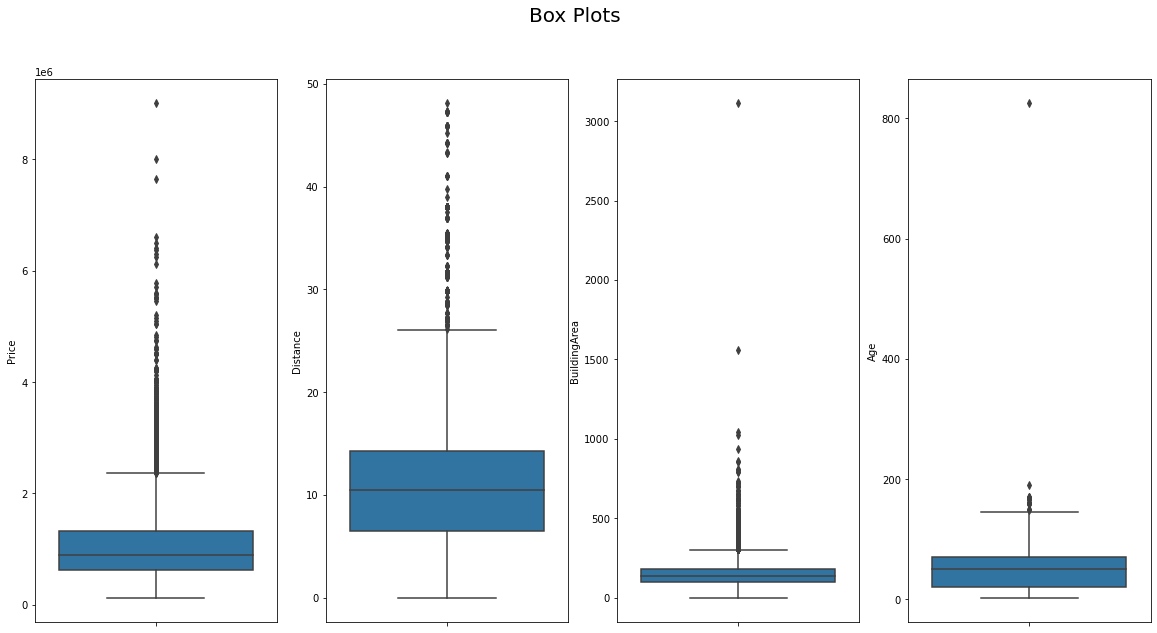

In [95]:
names = ['Price','Distance','BuildingArea','Age']
fig, axes = plt.subplots(1,len(names),figsize=(20,10))
plt.suptitle('Box Plots', fontsize=20)

for i,t in enumerate(names):
    sns.boxplot(y=t, data=data, orient='v', ax=axes[i])


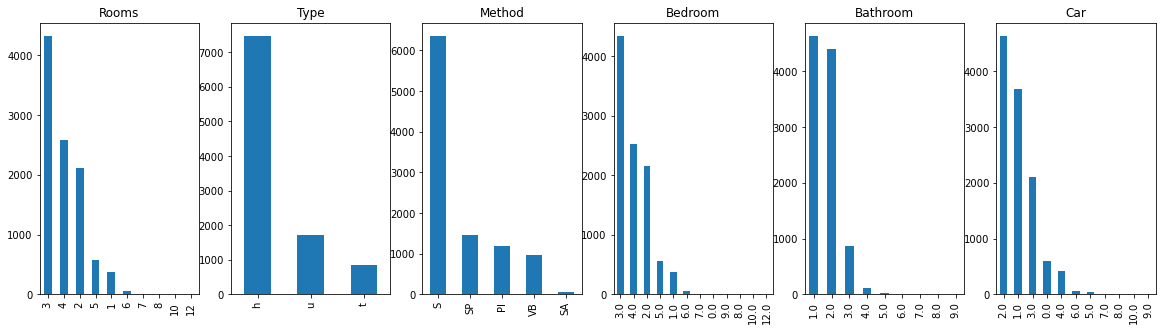

In [96]:
names = ['Rooms','Type','Method','Bedroom','Bathroom','Car']
fig, axes = plt.subplots(1,len(names),figsize=(20,5))
data['Rooms'].value_counts().plot(kind='bar')
for i,t in enumerate(names):
    data[t].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].title.set_text(t)

In [97]:
Suburb_LE = preprocessing.LabelEncoder()
data['Suburb_LE'] = Suburb_LE.fit_transform(data['Suburb'])
data.drop(labels='Suburb', axis=1, inplace=True)

In [98]:
Type_LE = preprocessing.LabelEncoder()
data['Type_LE'] = Type_LE.fit_transform(data['Type'])
data.drop(labels='Type', axis=1, inplace=True)

In [99]:
Method_LE = preprocessing.LabelEncoder()
data['Method_LE'] = Method_LE.fit_transform(data['Method'])
data.drop(labels='Method', axis=1, inplace=True)

In [100]:
data = data[data['Price']<=2000000]

In [101]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,9221.0,3.024184,0.923518,1.0,2.0,3.0,4.0,12.0
Price,9221.0,933641.524889,405882.687695,131000.0,620000.0,841000.0,1209000.0,2000000.0
Distance,9221.0,11.840104,7.217106,0.0,6.6,10.9,14.7,48.1
Bedroom,9221.0,3.006724,0.925511,0.0,2.0,3.0,4.0,12.0
Bathroom,9221.0,1.581824,0.645484,1.0,1.0,2.0,2.0,8.0
Car,9221.0,1.664245,0.947797,0.0,1.0,2.0,2.0,10.0
BuildingArea,9221.0,140.185811,73.345590,0.0,98.0,128.0,170.0,1561.0
Age,9221.0,52.039692,35.470203,3.0,21.0,51.0,71.0,825.0
Suburb_LE,9221.0,162.422731,91.993300,0.0,82.0,161.0,242.0,322.0
Type_LE,9221.0,0.463073,0.787420,0.0,0.0,0.0,1.0,2.0


# Train Test Split

In [102]:
X = data[['Rooms','Distance','Bedroom','Bathroom','Car','BuildingArea','Age','Type_LE','Method_LE','Suburb_LE']].values
Y = data['Price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Model Training Function

In [105]:
def model_train(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':y_pred, 'Y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['Y_act'], test_result['Y_pred']) 
    #precision = metrics.precision_score(test_result['Y_act'], test_result['Y_pred'], average='None')
    #f1_score = metrics.f1_score(test_result['Y_act'], test_result['Y_pred'], average='weighted')  #weighted accounts for label imbalance.
    #roc_auc = metrics.roc_auc_score(test_result['Y_act'], test_result['Y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

In [76]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2).fit(s.fit_transform(X_train), Y_train)
print(model.score(s.fit_transform(X_test), Y_test))



0.45680409980062453


In [77]:
s= StandardScaler()
model = LogisticRegression(n_jobs=3, verbose=1)
model.fit(s.fit_transform(X_train), Y_train)

y_pred = model.predict(s.fit_transform(X_test))
y_pred_prob = model.predict_proba(s.fit_transform(X_test))[:, 1]
test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':y_pred, 'Y_pred_prob':y_pred_prob})

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   51.4s finished


In [81]:
metrics.precision_score(test_result['Y_act'], test_result['Y_pred'], average=None)

D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [78]:
test_result

,Y_act,Y_pred,Y_pred_prob
0,800000.0,600000.0,7.489675e-07
1,1421000.0,1400000.0,5.259834e-07
2,1118000.0,1100000.0,3.258968e-05
3,1390000.0,760000.0,4.801704e-06
4,685000.0,750000.0,1.612646e-04
...,...,...,...
2760,1280000.0,750000.0,9.482459e-06
2761,665000.0,600000.0,7.852754e-07
2762,760000.0,500000.0,1.089374e-05
2763,371000.0,570000.0,3.855307e-06


In [104]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, Y_train, X_test, Y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, Y_train, X_test, Y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, Y_train, X_test, Y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, Y_train, X_test, Y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, Y_train, X_test, Y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   50.6s finished


ValueError: multi_class must be in ('ovo', 'ovr')

In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, Y_train)    

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\ens

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 500]},
             pre_dispatch=2, verbose=3)

In [107]:
print(gs_model.best_params_) 


{'max_depth': 10, 'n_estimators': 500}


In [108]:
from sklearn.metrics import classification_report, confusion_matrix 

Y_pred = gs_model.predict(X_test) 

print(classification_report(Y_test, Y_pred)) 
print(confusion_matrix(Y_test, Y_pred)) 

              precision    recall  f1-score   support

    131000.0       0.00      0.00      0.00         1
    145000.0       0.00      0.00      0.00         1
    170000.0       0.00      0.00      0.00         1
    185000.0       0.00      0.00      0.00         1
    200000.0       0.00      0.00      0.00         0
    210000.0       0.00      0.00      0.00         1
    222000.0       0.00      0.00      0.00         1
    227000.0       0.00      0.00      0.00         1
    250000.0       0.00      0.00      0.00         3
    257500.0       0.00      0.00      0.00         1
    260000.0       0.00      0.00      0.00         1
    270000.0       0.00      0.00      0.00         1
    275000.0       0.00      0.00      0.00         2
    275500.0       0.00      0.00      0.00         1
    279500.0       0.00      0.00      0.00         1
    280000.0       0.00      0.00      0.00         2
    282000.0       0.00      0.00      0.00         1
    283000.0       0.00    

D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\Anaconda\envs\ML_Course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\Anacon

### Since we are trying to control the light, light data can be dropped

In [23]:
data.drop(labels='Light', axis=1, inplace=True)
data.head()

,No.,date,Temperature,Humidity,CO2,HumidityRatio,Occupancy
0,140,2/2/2015 14:19,23.7000,26.272,749.200000,0.004764,1
1,141,2/2/2015 14:19,23.7180,26.290,760.400000,0.004773,1
2,142,2/2/2015 14:21,23.7300,26.230,769.666667,0.004765,1
3,143,2/2/2015 14:22,23.7225,26.125,774.750000,0.004744,1
4,144,2/2/2015 14:23,23.7540,26.200,779.000000,0.004767,1


### Also we don't need 'No.' coloumn.

In [24]:
data.drop(labels='No.', axis=1, inplace=True)
data.head()

,date,Temperature,Humidity,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,779.000000,0.004767,1


In [25]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,20560,16446,2/2/2015 14:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,20560.0,NaN,NaN,NaN,20.906212,1.055315,19.0,20.2,20.7,21.525,24.408333
Humidity,20560.0,NaN,NaN,NaN,27.655925,4.982154,16.745,24.5,27.29,31.29,39.5
CO2,20560.0,NaN,NaN,NaN,690.553276,311.201281,412.75,460.0,565.416667,804.666667,2076.5
HumidityRatio,20560.0,NaN,NaN,NaN,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,NaN,NaN,NaN,0.231031,0.421503,0.0,0.0,0.0,0.0,1.0


### Remove repeated data

In [50]:
data.drop_duplicates(inplace=True)

In [51]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,20500.0,20.908042,1.055437,19.000000,20.200000,20.700000,21.52500,24.408333
Humidity,20500.0,27.651199,4.979951,16.745000,24.500000,27.290000,31.27875,39.500000
CO2,20500.0,690.798294,311.246435,412.750000,460.000000,565.666667,805.00000,2076.500000
HumidityRatio,20500.0,0.004228,0.000768,0.002674,0.003719,0.004291,0.00483,0.006476
Occupancy,20500.0,0.231707,0.421933,0.000000,0.000000,0.000000,0.00000,1.000000


### Identify `X` and `y`

,Temperature,Humidity,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.156385,0.449865,0.205962,0.555651
Humidity,-0.156385,1.000000,0.300843,0.932683,0.046870
CO2,0.449865,0.300843,1.000000,0.478957,0.502032
HumidityRatio,0.205962,0.932683,0.478957,1.000000,0.257985
Occupancy,0.555651,0.046870,0.502032,0.257985,1.000000


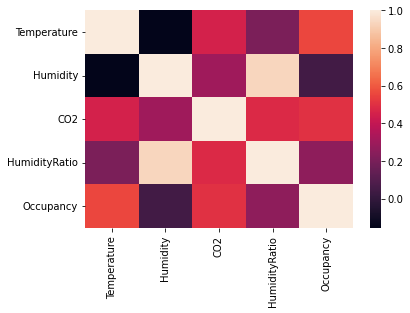

In [63]:
correlation_matrix = data[['Temperature', 'Humidity', 'CO2','HumidityRatio', 'Occupancy']].corr()
sns.heatmap(correlation_matrix)
correlation_matrix

### Since correlation between Humidity and Occupancy is very low, the X variables will be 'Temperature', 'CO2' and 'HumidityRatio' .

<AxesSubplot:ylabel='Temperature'>

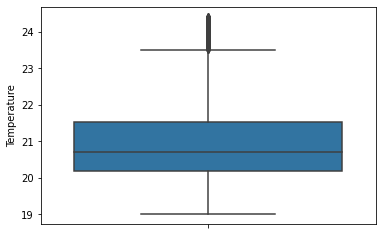

In [77]:
sns.boxplot(y="Temperature", data=data)

<AxesSubplot:ylabel='CO2'>

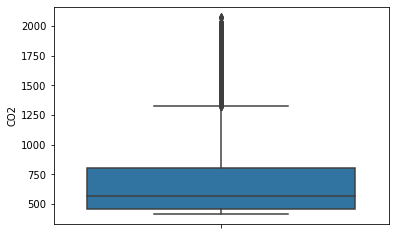

In [90]:
sns.boxplot(y="CO2", data=data)

<AxesSubplot:ylabel='HumidityRatio'>

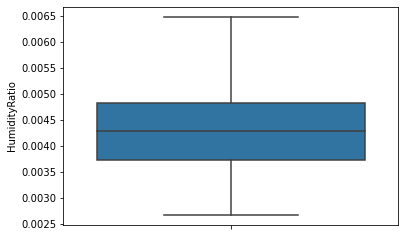

In [91]:
sns.boxplot(y="HumidityRatio", data=data)

### 'Temperature' and 'CO2' has outliers those are need to be removed

In [92]:
cols = ['Temperature','CO2'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
down = (Q1 - (1.5 * IQR))
up = (Q3 + (1.5 * IQR))

print(down)
print(up)

df = data[~((data[cols] < down) |(data[cols] > up)).any(axis=1)]

Temperature    18.2125
CO2           -57.5000
dtype: float64
Temperature      23.5125
CO2            1322.5000
dtype: float64


In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,18544.0,20.778745,0.948301,19.000000,20.100000,20.600000,21.340000,23.500000
Humidity,18544.0,27.386800,4.915245,16.745000,24.340000,27.200000,30.926667,39.500000
CO2,18544.0,624.256442,212.904662,412.750000,454.383333,540.000000,729.425000,1322.500000
HumidityRatio,18544.0,0.004151,0.000729,0.002674,0.003677,0.004244,0.004745,0.005694
Occupancy,18544.0,0.205565,0.404125,0.000000,0.000000,0.000000,0.000000,1.000000


In [95]:
X_variables = ['Temperature', 'CO2','HumidityRatio']
y_varibale = 'Occupancy'
X = df[X_variables].values
Y = df[y_varibale].values

### Train Test Split

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 12980
Test sample size  = 5564


### Fit Model and Prediction

In [97]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [98]:
Y_pred_proba = model.predict_proba(X_test)
Y_pred = model.predict(X_test)

In [99]:
test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':Y_pred, 'Y_pred_prob_0':Y_pred_proba[:, 0] , 'Y_pred_prob_1':Y_pred_proba[:, 1]})
test_result.sample(10)

,Y_act,Y_pred,Y_pred_prob_0,Y_pred_prob_1
1207,1,0,0.809230,0.190770
3660,0,0,0.940769,0.059231
5319,0,0,0.956020,0.043980
3568,0,0,0.895904,0.104096
2717,0,0,0.994816,0.005184
3839,0,0,0.979768,0.020232
3944,0,0,0.929043,0.070957
1223,0,0,0.907030,0.092970
3827,1,0,0.695549,0.304451
3000,0,0,0.962113,0.037887


### Confusion Matrix

In [100]:
cfm = pd.crosstab(test_result['Y_act'], test_result['Y_pred'], margins=True)
cfm

Y_pred,0,1,All
Y_act,,,
0,4202,242,4444
1,373,747,1120
All,4575,989,5564


In [101]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1]) / cfm.loc['All','All'] 
acuracy

0.8894680086268871

### Receiver operating characteristic (ROC)

ROC AUC Score = 0.9310099090266171


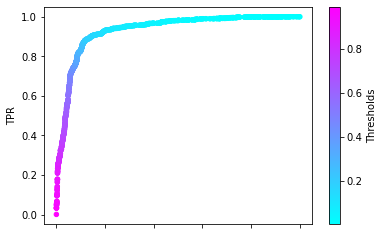

In [102]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['Y_act'], test_result['Y_pred_prob_1'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['Y_act'], test_result['Y_pred_prob_1'])

print(F"ROC AUC Score = {roc_auc}")

### Precision Recall Curve (PRC)

<AxesSubplot:xlabel='Recall', ylabel='Precision'>

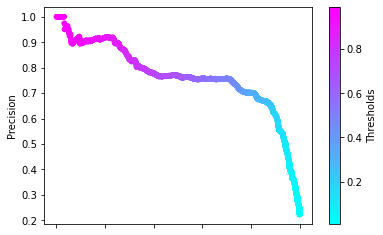

In [103]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['Y_act'], test_result['Y_pred_prob_1'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)